# CORE: INDIVIDUAL PROJECT
## AIM: DEVELOP A STAFFING PROMOTION ALGORITHM

## Defining the Learning Objective

    a) Specifying the Data Analytics Question
   > To predict the important features that can be used to predict promotion eligibility.

In [ ]:
import sys

!{sys.executable} -m pip install google-colab

In [ ]:
from google.colab import files
uploaded = files.upload()

## Importing Libraries

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mnso
import pandas_profiling
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Spliting
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import model_selection

# Sampling  
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample

# Machine Learning
from sklearn import svm  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score
from sklearn import metrics
from collections import Counter
from sklearn.svm import LinearSVC, SVC, SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
import graphviz

# roc curve and auc score
from sklearn.metrics import roc_curve, roc_auc_score, auc

### Loading the Dataf1_score

In [3]:
Main_Data = pd.read_csv('data.csv')
Main_Data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,No,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,Yes,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,Yes,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,Yes,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,Yes,No,No,1,0


In [4]:
Data_Prof_Main_Data = Main_Data.profile_report(title ='Pandas Profiling Report', plot={'histogram': {'bins': 8}})
rejected_variables = Data_Prof_Main_Data.get_rejected_variables(threshold=0.9)
Data_Prof_Main_Data

In [4]:
import sys
!{sys.executable} -m pip install plotly

    100% |████████████████████████████████| 7.3MB 90kB/s eta 0:00:01
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /home/iamgoddey/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [5]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique Performance of Employee
num_unique = len(Main_Data['Last_performance_score'].unique())
print('Number of Unique_Values = ', num_unique)

# Count the Performance of each Employee and sort them in descending order
Perform=Main_Data['Last_performance_score'].value_counts().sort_values(ascending=False)
print(Perform)
data = [go.Bar(
        x = Perform.index, # index = Employee ID
        y = Perform.values, # value = count
)]

plotly.offline.iplot(data)
plt.show()

Number of Unique_Values =  6
7.5     12993
12.5     8213
10.0     6932
2.5      4325
5.0      2944
0.0      2905
Name: Last_performance_score, dtype: int64


### Preparing a comprehensive exploratory data analysis (EDA)

* The Summary of a DataFrame helps to understand the type of variable, data type and presence of null values.

In [6]:
# The size of Data set
print('The size of the Train_Riders data is :', Main_Data.size)

# Show dimension of the data
print("Dimension: {}".format(Main_Data.shape))

The size of the Train_Riders data is : 651304
Dimension: (38312, 17)


* The size of Main_Data is 651304 which is made up of the number of rows times the number of columns of the DataFrame.
* The Main_Data comprises of 38312 observations and 17 features,
* out of which one is dependent variable (Target - Promoted_or_Not) and the remaining 18 are independent variables.

In [7]:
print(Main_Data.columns.values)

['EmployeeNo' 'Division' 'Qualification' 'Gender' 'Channel_of_Recruitment'
 'Trainings_Attended' 'Year_of_birth' 'Last_performance_score'
 'Year_of_recruitment' 'Targets_met' 'Previous_Award'
 'Training_score_average' 'Foreign_schooled' 'Past_Disciplinary_Action'
 'Previous_IntraDepartmental_Movement' 'No_of_previous_employers'
 'Promoted_or_Not']


- Lable of each column of the Dataset

In [8]:
print(Main_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 17 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
Foreign_schooled                       38312 non-null object
Past_Disciplinary_Action               38312 non-null object
Previous_IntraDepartmental_Movement    383

* The Data have float64, object and integer values
* In the dataset, Qualification column have null/missing values

## Summary Statistics

In [9]:
Target_Column = ['Promoted_or_Not']
Predictors = list(set(list(Main_Data.columns))-set(Target_Column))
Numeric_Data = Main_Data._get_numeric_data()
Stat_of_Main_Data = Numeric_Data.describe(include='all')
Stat_of_Main_Data = Stat_of_Main_Data.transpose()
Stat_of_Main_Data.to_csv('Descriptive_Statistics_of_Data.csv', index=False)
Stat_of_Main_Data

,count,mean,std,min,25%,50%,75%,max
Trainings_Attended,38312.0,2.253680,0.609443,2.0,2.0,2.0,2.0,11.0
Year_of_birth,38312.0,1986.209334,7.646047,1950.0,1982.0,1988.0,1992.0,2001.0
Last_performance_score,38312.0,7.698959,3.744135,0.0,5.0,7.5,10.0,12.5
Year_of_recruitment,38312.0,2013.139695,4.261451,1982.0,2012.0,2014.0,2016.0,2018.0
Targets_met,38312.0,0.352996,0.477908,0.0,0.0,0.0,1.0,1.0
Previous_Award,38312.0,0.023152,0.150388,0.0,0.0,0.0,0.0,1.0
Training_score_average,38312.0,55.366465,13.362741,31.0,43.0,52.0,68.0,91.0
Promoted_or_Not,38312.0,0.084595,0.278282,0.0,0.0,0.0,0.0,1.0


## Key Observations -

* Mean value is greater than the median value of each column represented by 50%(50th percentile) in the row
* Notably, there is a large differnece in 75th percentile and Max values of predictors "Trainings_Attended", "Year_of_birth", "Year_of_recruitment" and "Training_score_average" but the remaining predictors have small (or equal) difference in the 75th percentile and Max values 
* Thus, observations 1 and 2 suggests that there are extreme values/Outliers in some part of our dataset. *We confirmed this by using boxplot as it is better visualisation for outliers* 

## To Check for Outliers

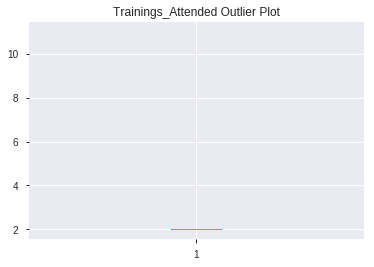

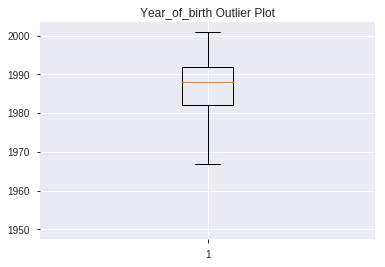

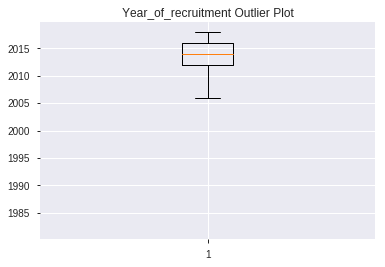

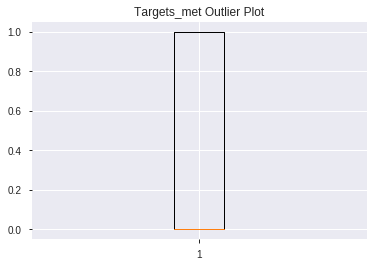

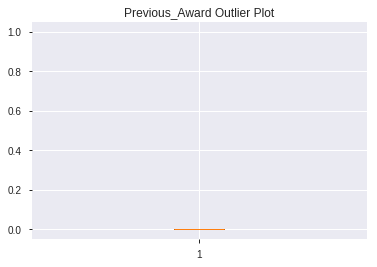

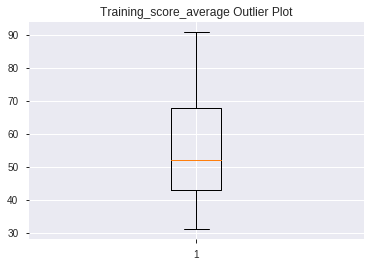

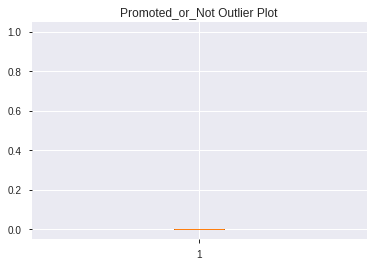

In [10]:
def Detecting_Outliers(Data):
    
    threshold=1
    mean = np.mean(Data) # computing mean of the dataset
    std =np.std(Data)  # computing the standard deviation
    
    for y in Data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > threshold:
            Outliers.append(y)        
    return Outliers

fig=plt.figure()

for i  in range(0,len(Main_Data.columns)):
    Outliers=[]
   
    if Main_Data[Main_Data.columns[i]].dtypes== np.int64 or Main_Data[Main_Data.columns[i]].dtypes== np.int64  :
        
        Outliers=Detecting_Outliers(Main_Data.iloc[:,i])
        if len(Outliers)>0:
                   
            ax = plt.subplot(1,1,1)
            #Variable
            ax.boxplot(Main_Data[list(Main_Data.columns)[i]])
            plt.title(list(Main_Data.columns)[i] + " Outlier Plot")
            plt.show()

* The Numerical (int64) features with the Black dots either above or below the whisk are all having outliers
* Outliers are performed on Numerical Variables of the Dataset

In [11]:
# Numeric Data
Numeric_Data = Main_Data._get_numeric_data()
Numeric_Data.head(3)

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
0,2,1986,12.5,2011,1,0,41,0
1,2,1991,12.5,2015,0,0,52,0
2,2,1987,7.5,2012,0,0,42,0


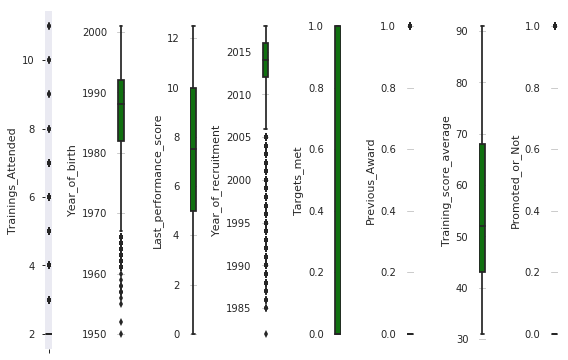

In [12]:
lent = Numeric_Data.columns.values
number_of_columns = 8
number_of_rows = len(lent)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(lent)):
    plt.subplot(number_of_rows + 1, number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(Numeric_Data[lent[i]],color='green',orient='v')
    plt.tight_layout()

## Performing KDE

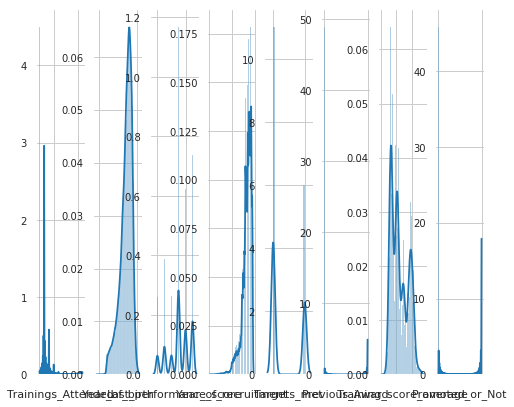

In [13]:
plt.figure(figsize=(number_of_columns, 8*number_of_rows))
for i in range(0,len(lent)):
    plt.subplot(number_of_rows + 1, number_of_columns,i+1)
    chart=sns.distplot(Numeric_Data[lent[i]], kde=True) 
    chart.set_xticklabels(chart.get_xticklabels(), rotation=None, 
                          horizontalalignment='right')
plt.show()

## Univariate Analysis

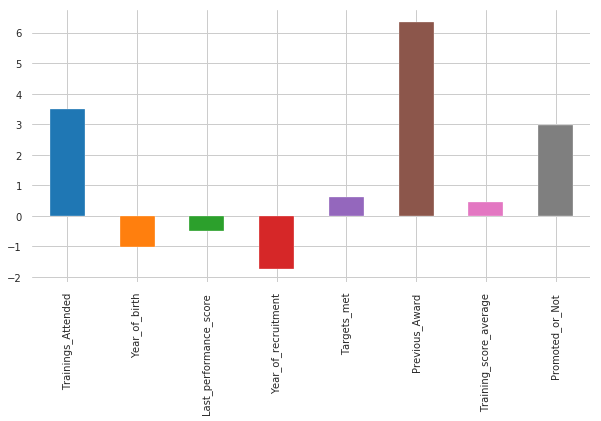

In [14]:
# Calculating Skewness in the columns of our Numeric dataset

Numeric_Data.skew().plot.bar(figsize =(10,5))
plt.show()

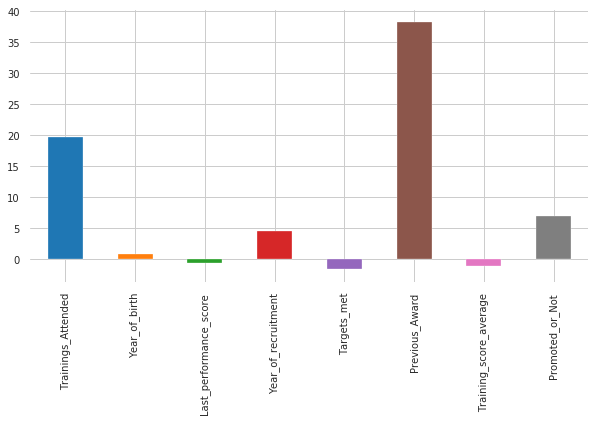

In [15]:
# Measuring Kurtosis in our Numeric dataset

Numeric_Data.kurt().plot.bar(figsize =(10,5))
plt.show()

## Understanding the Target Variable

In [16]:
Main_Data['Promoted_or_Not'].unique()

array([0, 1])

* Target variable/Dependent variable is dummy variable in nature. 
* If the Employee is Promoted, it is a 1 and if Not, it is a 0.

In [17]:
Main_Data['Promoted_or_Not'].value_counts(sort=True)

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

* This tells us the vote count of whether employees are promoted or not in descending order.
* Promoted_or_Not has most values concentrated on _Not Promoted_
* Few employees are mostly Promoted. $\textbf{Therefore, we can infer that the data is imbalanced}$

## Visualising the Dataset
### Checking for Missing Values in the Data

## Missing Values

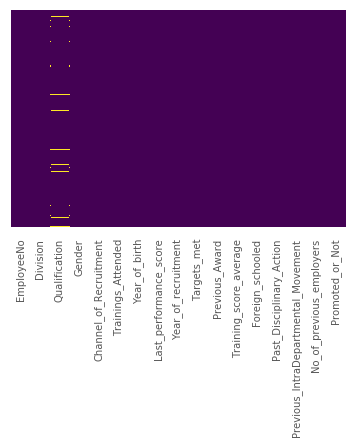

In [18]:
import matplotlib.style as style
style.use('ggplot')
sns.heatmap(Main_Data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

* The Dataset has missing values in the _"Qualification"_ Variable
* The missing values are noticed in figure (above) represented by yellow colour shade on the purple background.

In [19]:
def percent_missing(Main_Data):
    return Main_Data.isnull().sum()/Main_Data.isnull().count()

In [20]:
# Total number and Percentage of missing values in the dataset

missing_table = pd.concat([Main_Data.isnull().sum(),percent_missing(Main_Data)], axis=1, 
                         keys=['Total_Missing', 'Percent_Missing'], sort = False)
missing_table.to_csv('missing.csv',index=True)

missing_table.head(3)

,Total_Missing,Percent_Missing
EmployeeNo,0,0.000000
Division,0,0.000000
Qualification,1679,0.043824


In [21]:
missing_table2 = missing_table[missing_table.Total_Missing!=0]

# Save to CSV file
missing_table2.to_csv('missing_Specific.csv',index=True)

# print
missing_table2

,Total_Missing,Percent_Missing
Qualification,1679,0.043824


* The Data has total percent missing cells of  0.3% (from the Pandas_Profiling above)
* The percentage of missing values in the Qualification variable is 4.38%

## Checking for Correlation

### Correlation Matrix

In [22]:
Corr_Matrix = Main_Data.corr()
Corr_Matrix

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
Trainings_Attended,1.000000,0.078710,-0.062042,0.056215,-0.044789,-0.007409,0.041065,-0.024345
Year_of_birth,0.078710,1.000000,-0.175572,0.654666,0.025337,0.013627,0.048390,0.017991
Last_performance_score,-0.062042,-0.175572,1.000000,-0.190333,0.276350,0.026587,0.057836,0.119690
Year_of_recruitment,0.056215,0.654666,-0.190333,1.000000,0.076910,0.041995,0.037477,0.012287
Targets_met,-0.044789,0.025337,0.276350,0.076910,1.000000,0.092934,0.077201,0.224518
Previous_Award,-0.007409,0.013627,0.026587,0.041995,0.092934,1.000000,0.072360,0.201434
Training_score_average,0.041065,0.048390,0.057836,0.037477,0.077201,0.072360,1.000000,0.178448
Promoted_or_Not,-0.024345,0.017991,0.119690,0.012287,0.224518,0.201434,0.178448,1.000000


* From the Correlation Matrix above, we see that the _"Trainings_Attended"_ variable has high correlation with the other variables but not a basis to conclude that it is an important feature or not.
* The _"Previous_Award"_ variable has very low correlation with the remaining variables and can infer that it is neglible. However, the correlation matrix is not a basis to drop or remove feature as it can be deceicing. 

#### A seaborn heatmap to better show the correlation matrix

Text(0.5, 1.0, 'Heatmap')

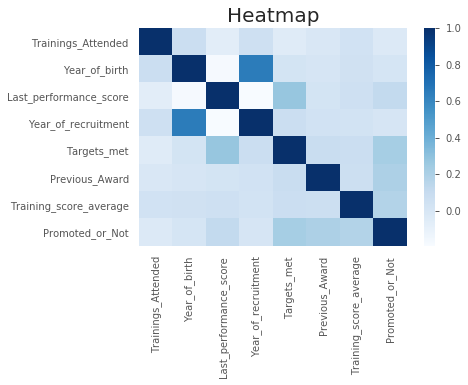

In [23]:
import matplotlib.style as style
style.use('ggplot')

plt.subplots() #(figsize=(6,4))
sns.heatmap(Corr_Matrix,cmap='Blues',annot=False) 
plt.title('Heatmap', fontsize=20)

* Dark shades in the Dataset represents positive correlation while lighter shades represents negative correlation and the faded represents No or weak correlation.
* If we set annot=True, you'll get values by which features are correlated to each other in grid-cells. The code is implemented below

Text(0.5, 1.0, 'Pearson Correlation of Features')

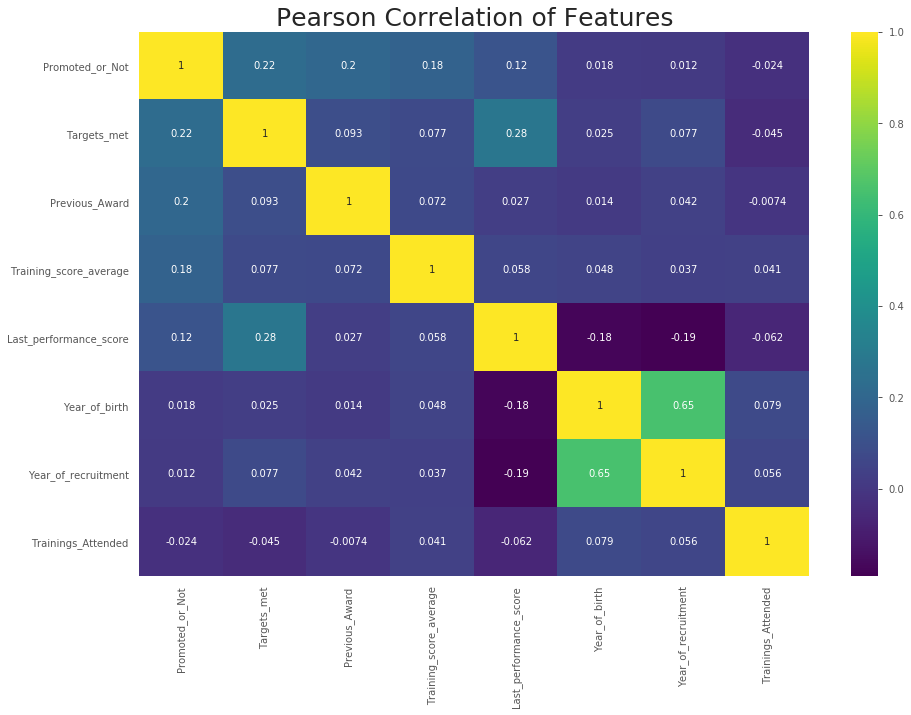

In [24]:
import matplotlib.style as style
style.use('ggplot')

k = 17  # number of variables of Data for heatmap
cols = Corr_Matrix.nlargest(k, 'Promoted_or_Not')['Promoted_or_Not'].index
cm = Main_Data[cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.title('Pearson Correlation of Features', fontsize=25)

### Creating a copy of the Main Data

In [26]:
New_Data = Main_Data.copy()

In [27]:
Main_Data.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'Foreign_schooled',
       'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement',
       'No_of_previous_employers', 'Promoted_or_Not'],
      dtype='object')

## Dealing with Missing Values

In [28]:
New_Data['Qualification'].fillna('First Degree or HND', inplace=True)
New_Data.Qualification.head(10)

0       MSc, MBA and PhD
1    First Degree or HND
2    First Degree or HND
3    First Degree or HND
4    First Degree or HND
5    First Degree or HND
6       MSc, MBA and PhD
7    First Degree or HND
8       MSc, MBA and PhD
9    First Degree or HND
Name: Qualification, dtype: object

* We filled all NaN's with the mode of the Qualification Variable, with which we can infer that the company employs people with First Degree or HND

In [29]:
Missing = New_Data.isnull().sum()
Missing

EmployeeNo                             0
Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
Foreign_schooled                       0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Promoted_or_Not                        0
dtype: int64

In [30]:
# Saving the cleaned datasets
New_Data.to_csv('Data_cleaned.csv')

# Feature Engineering

### Converting Year_of_Birth into Age of the Employee

In [31]:
print(New_Data['Year_of_birth'].min())
New_Data['Year_of_birth'].max()

1950


2001

In [32]:
New_Data['Year_of_birth'].head()

0    1986
1    1991
2    1987
3    1982
4    1990
Name: Year_of_birth, dtype: int64

In [33]:
Age = []
Current_year = 2019 # We suppose the Decision will be made in the current year
for year in New_Data['Year_of_birth']:
    years = Current_year - year
    Age.append(years)

In [34]:
New_Data['Age_of_Employee'] = Age

In [35]:
New_Data['Age_of_Employee'].head(3)

0    33
1    28
2    32
Name: Age_of_Employee, dtype: int64

In [36]:
New_Data.head(2)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age_of_Employee
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,No,No,No,0,0,33
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,Yes,No,No,0,0,28


### Converting "Year_of_Recruitment" into "Number_of_Years_Worked"

In [37]:
Number_years = []
Current_year = 2019 # We suppose the Decision will be made in the current year
for year in New_Data['Year_of_recruitment']:
    years = Current_year - year
    Number_years.append(years)

In [38]:
New_Data['Number_of_Years_Worked'] = Number_years

In [39]:
New_Data['Number_of_Years_Worked'].head(5)

0     8
1     4
2     7
3    10
4     7
Name: Number_of_Years_Worked, dtype: int64

### Creating a Feature for Employee starting his/her career with the Organisation

In [40]:
'''
If the No of previous employers is counted to be 0, then we consider the 
Employee to start his/her career with the organisation with "YES".
Otherwise, "NO".
''' 
New_Data['Started_work_at_the_company']=np.where(New_Data['No_of_previous_employers']=='0',
                                                 'Yes','No')

In [41]:
New_Data[["Started_work_at_the_company", 'No_of_previous_employers']].head(5)

,Started_work_at_the_company,No_of_previous_employers
0,Yes,0
1,Yes,0
2,Yes,0
3,No,1
4,No,1


### Creating a feature using the last performance score and his/her Targets met

In [42]:
print(np.round(New_Data['Last_performance_score'].mean(), 0)) # to the nearest whole number

print(New_Data['Last_performance_score'].min()) # To check the minimum of the Performance
print(New_Data['Last_performance_score'].max()) # TO check the Maximum of the Performance

8.0
0.0
12.5


In [43]:
'''
Using the mean of the Performance Score as the Pass score with the associated Targets 
he/she met, we create a feature for the Employee to see whether he/she is devoted to the 
job setting 

'''

for i, row in New_Data.iterrows():
    if (New_Data.loc[i, 'Last_performance_score']>=8 and New_Data.loc[i, 'Targets_met']==1):
        New_Data.loc[i, 'Employee_Attitude']='Devoted'
    else:
        New_Data.loc[i, 'Employee_Attitude']='Not Devoted'    

In [44]:
New_Data[['Last_performance_score', 'Targets_met', 'Employee_Attitude']].head(10)

,Last_performance_score,Targets_met,Employee_Attitude
0,12.5,1,Devoted
1,12.5,0,Not Devoted
2,7.5,0,Not Devoted
3,2.5,0,Not Devoted
4,7.5,0,Not Devoted
5,7.5,0,Not Devoted
6,7.5,0,Not Devoted
7,10.0,0,Not Devoted
8,12.5,1,Devoted
9,12.5,1,Devoted


### Creating a Feature: Ranking the Last Performance Score of Employees 

 - Into High, Average and Low Performance using the mean of the Last Performance Score as a Threshold

In [45]:
'''
Using the Performances of each employee, we creature a new feauture to 
rank the performance of their score using a threshold.
'''

Ranking_Perfrom = []

# Using a 'for loop' to populate the list
for score in New_Data['Last_performance_score']:
    if (score>=0 and score<7):
         Ranking_Perfrom.append('Low')
    elif (score>=7 and score<10):
         Ranking_Perfrom.append('Average')
    else:
         Ranking_Perfrom.append('High')

# Storing the data as a column in New_Data
New_Data['Performance_Ranking'] = Ranking_Perfrom

In [46]:
New_Data.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age_of_Employee,Number_of_Years_Worked,Started_work_at_the_company,Employee_Attitude,Performance_Ranking
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,...,No,No,No,0,0,33,8,Yes,Devoted,High
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,...,Yes,No,No,0,0,28,4,Yes,Not Devoted,High
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,...,Yes,No,No,0,0,32,7,Yes,Not Devoted,Average


In [47]:
New_Data[['Last_performance_score', 'Targets_met', 'Employee_Attitude', 
          'Performance_Ranking']].head(10)

,Last_performance_score,Targets_met,Employee_Attitude,Performance_Ranking
0,12.5,1,Devoted,High
1,12.5,0,Not Devoted,High
2,7.5,0,Not Devoted,Average
3,2.5,0,Not Devoted,Low
4,7.5,0,Not Devoted,Average
5,7.5,0,Not Devoted,Average
6,7.5,0,Not Devoted,Average
7,10.0,0,Not Devoted,High
8,12.5,1,Devoted,High
9,12.5,1,Devoted,High


In [48]:
print(New_Data['Trainings_Attended'].min())
print(New_Data['Trainings_Attended'].max())
print(New_Data['Trainings_Attended'].mean())

2
11
2.2536803090415534


### Creating A Feature for Trainings of Employee and the Awards Received

In [49]:
'''
This feature categorizes employees into Few trainings without any award, 
Few trainings with awards, More trainings with awards and 
More trainings without any award
'''

for i, row in New_Data.iterrows():
    if (New_Data.loc[i, 'Trainings_Attended'] <= 6 and New_Data.loc[i, 'Previous_Award']==0):
        New_Data.loc[i, 'Trainings_and_Awards'] = 'Few_Trainings_without_Award'
    elif (New_Data.loc[i, 'Trainings_Attended'] <= 6 and New_Data.loc[i, 'Previous_Award']==1):
        New_Data.loc[i, 'Trainings_and_Awards'] = 'Few_Trainings_with_Awards'
    elif (New_Data.loc[i, 'Trainings_Attended'] > 6 and New_Data.loc[i, 'Previous_Award']==1):
        New_Data.loc[i, 'Trainings_and_Awards'] = 'More_Trainings_with_Awards'
    else:
        New_Data.loc[i, 'Trainings_and_Awards'] = 'More_Trainings_without_Award'

In [50]:
New_Data['Trainings_and_Awards'].value_counts()

Few_Trainings_without_Award     37378
Few_Trainings_with_Awards         887
More_Trainings_without_Award       47
Name: Trainings_and_Awards, dtype: int64

In [51]:
New_Data[['Last_performance_score', 'Targets_met', 'Employee_Attitude', 
          'Performance_Ranking', 'Trainings_Attended','Trainings_and_Awards']].head(10)

,Last_performance_score,Targets_met,Employee_Attitude,Performance_Ranking,Trainings_Attended,Trainings_and_Awards
0,12.5,1,Devoted,High,2,Few_Trainings_without_Award
1,12.5,0,Not Devoted,High,2,Few_Trainings_without_Award
2,7.5,0,Not Devoted,Average,2,Few_Trainings_without_Award
3,2.5,0,Not Devoted,Low,3,Few_Trainings_without_Award
4,7.5,0,Not Devoted,Average,3,Few_Trainings_without_Award
5,7.5,0,Not Devoted,Average,2,Few_Trainings_without_Award
6,7.5,0,Not Devoted,Average,2,Few_Trainings_without_Award
7,10.0,0,Not Devoted,High,2,Few_Trainings_without_Award
8,12.5,1,Devoted,High,2,Few_Trainings_without_Award
9,12.5,1,Devoted,High,2,Few_Trainings_without_Award


# Machine Learning

In [52]:
Full_Data = New_Data.copy()

In [53]:
Full_Data.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age_of_Employee,Number_of_Years_Worked,Started_work_at_the_company,Employee_Attitude,Performance_Ranking,Trainings_and_Awards
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,...,No,No,0,0,33,8,Yes,Devoted,High,Few_Trainings_without_Award
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,...,No,No,0,0,28,4,Yes,Not Devoted,High,Few_Trainings_without_Award
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,...,No,No,0,0,32,7,Yes,Not Devoted,Average,Few_Trainings_without_Award


### Encoding Categorical Variables

In [54]:
Numeric_Data = Full_Data._get_numeric_data()
Numeric_Data.drop(['Year_of_birth','Year_of_recruitment'], axis=1, inplace=True)
Numeric_Data.head(5)

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Age_of_Employee,Number_of_Years_Worked
0,2,12.5,1,0,41,0,33,8
1,2,12.5,0,0,52,0,28,4
2,2,7.5,0,0,42,0,32,7
3,3,2.5,0,0,42,0,37,10
4,3,7.5,0,0,77,0,29,7


In [55]:
def VIF(Numeric_Data, thresh=10):
    variables = list(range(Numeric_Data.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(Numeric_Data.iloc[:, variables].values, ix)
               for ix in range(Numeric_Data.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + Numeric_Data.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining Variables are :')
    print(Numeric_Data.columns[variables])
    return Numeric_Data.iloc[:, variables]

In [56]:
Cleaned_Numeric_Data = VIF(Numeric_Data)

dropping 'Age_of_Employee' at index: 6
dropping 'Training_score_average' at index: 4
Remaining Variables are :
Index(['Trainings_Attended', 'Last_performance_score', 'Targets_met',
       'Previous_Award', 'Promoted_or_Not', 'Number_of_Years_Worked'],
      dtype='object')


In [57]:
Categorical_Feature = Full_Data.drop(['EmployeeNo'], axis=1, inplace=True)
Categorical_Feature = Full_Data.select_dtypes(include=['object'])
Categorical_Feature.head(2)

,Division,Qualification,Gender,Channel_of_Recruitment,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Started_work_at_the_company,Employee_Attitude,Performance_Ranking,Trainings_and_Awards
0,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,No,No,No,0,Yes,Devoted,High,Few_Trainings_without_Award
1,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,Yes,No,No,0,Yes,Not Devoted,High,Few_Trainings_without_Award


In [58]:
Categorical_Variables = pd.get_dummies(Categorical_Feature)
Categorical_Variables.head(2)

,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,Qualification_First Degree or HND,...,Started_work_at_the_company_No,Started_work_at_the_company_Yes,Employee_Attitude_Devoted,Employee_Attitude_Not Devoted,Performance_Ranking_Average,Performance_Ranking_High,Performance_Ranking_Low,Trainings_and_Awards_Few_Trainings_with_Awards,Trainings_and_Awards_Few_Trainings_without_Award,Trainings_and_Awards_More_Trainings_without_Award
0,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0


In [59]:
Complete_Variables = pd.concat([Numeric_Data, Categorical_Variables], axis=1)
Complete_Variables.head(2)

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Age_of_Employee,Number_of_Years_Worked,Division_Business Finance Operations,Division_Commercial Sales and Marketing,...,Started_work_at_the_company_No,Started_work_at_the_company_Yes,Employee_Attitude_Devoted,Employee_Attitude_Not Devoted,Performance_Ranking_Average,Performance_Ranking_High,Performance_Ranking_Low,Trainings_and_Awards_Few_Trainings_with_Awards,Trainings_and_Awards_Few_Trainings_without_Award,Trainings_and_Awards_More_Trainings_without_Award
0,2,12.5,1,0,41,0,33,8,0,1,...,0,1,1,0,0,1,0,0,1,0
1,2,12.5,0,0,52,0,28,4,0,0,...,0,1,0,1,0,1,0,0,1,0


In [60]:
Complete_Variables.columns

Index(['Trainings_Attended', 'Last_performance_score', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'Promoted_or_Not',
       'Age_of_Employee', 'Number_of_Years_Worked',
       'Division_Business Finance Operations',
       'Division_Commercial Sales and Marketing',
       'Division_Customer Support and Field Operations',
       'Division_Information Technology and Solution Support',
       'Division_Information and Strategy', 'Division_People/HR Management',
       'Division_Regulatory and Legal services',
       'Division_Research and Innovation', 'Division_Sourcing and Purchasing',
       'Qualification_First Degree or HND', 'Qualification_MSc, MBA and PhD',
       'Qualification_Non-University Education', 'Gender_Female',
       'Gender_Male', 'Channel_of_Recruitment_Agency and others',
       'Channel_of_Recruitment_Direct Internal process',
       'Channel_of_Recruitment_Referral and Special candidates',
       'Foreign_schooled_No', 'Foreign_schooled_Yes',


In [61]:
# check variance and consider removing variable with low variance 
# variables with low variance will not explain the variation in target variable

Complete_Variables.var().sort_values()

Trainings_and_Awards_More_Trainings_without_Award           0.001225
Past_Disciplinary_Action_Yes                                0.003926
Past_Disciplinary_Action_No                                 0.003926
No_of_previous_employers_More than 5                        0.010357
Qualification_Non-University Education                      0.015062
Division_Research and Innovation                            0.017837
Division_Regulatory and Legal services                      0.018767
Channel_of_Recruitment_Referral and Special candidates      0.020646
Trainings_and_Awards_Few_Trainings_with_Awards              0.022617
Previous_Award                                              0.022617
Trainings_and_Awards_Few_Trainings_without_Award            0.023785
No_of_previous_employers_5                                  0.024008
No_of_previous_employers_4                                  0.033365
No_of_previous_employers_3                                  0.039708
Division_People/HR Management     

In [62]:
Complete_Variables_v0 = pd.concat([Cleaned_Numeric_Data, Categorical_Variables], axis=1)
Complete_Variables_v0.head(2)

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Promoted_or_Not,Number_of_Years_Worked,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,...,Started_work_at_the_company_No,Started_work_at_the_company_Yes,Employee_Attitude_Devoted,Employee_Attitude_Not Devoted,Performance_Ranking_Average,Performance_Ranking_High,Performance_Ranking_Low,Trainings_and_Awards_Few_Trainings_with_Awards,Trainings_and_Awards_Few_Trainings_without_Award,Trainings_and_Awards_More_Trainings_without_Award
0,2,12.5,1,0,0,8,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
1,2,12.5,0,0,0,4,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0


In [63]:
Complete_Variables_v0.var().sort_values()

# check variance and consider removing variable with low variance 
# variables with low variance will not explain the variation in target variable

Trainings_and_Awards_More_Trainings_without_Award          0.001225
Past_Disciplinary_Action_Yes                               0.003926
Past_Disciplinary_Action_No                                0.003926
No_of_previous_employers_More than 5                       0.010357
Qualification_Non-University Education                     0.015062
Division_Research and Innovation                           0.017837
Division_Regulatory and Legal services                     0.018767
Channel_of_Recruitment_Referral and Special candidates     0.020646
Previous_Award                                             0.022617
Trainings_and_Awards_Few_Trainings_with_Awards             0.022617
Trainings_and_Awards_Few_Trainings_without_Award           0.023785
No_of_previous_employers_5                                 0.024008
No_of_previous_employers_4                                 0.033365
No_of_previous_employers_3                                 0.039708
Division_People/HR Management                   

- When we compare both Complete_Variables and Complete_Variables_v0, we see that, the tail(4)
- has high variance with the Target variable hence we continue the analysis without applying 
- the variance inflation factor to drop these variables and will not remove any other variables

## Check for class imbalance in the dataset.

In [64]:
Complete_Variables['Promoted_or_Not'].value_counts(sort=True)

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

- We can see that the Majority Class is the _"Not Promoted"_ Class which is represented by zero (0).
- The Minority Class is the _"Promoted"_ Class which is represented by one (1). 

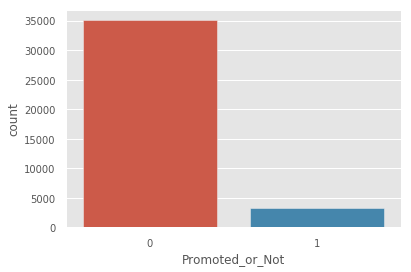

In [65]:
# Now lets check the Promoted_or_Not distributions
sns.countplot("Promoted_or_Not", data=Complete_Variables)

- As we know data is imbalanced and the graph shown above also confirmed it

### Checking for the Percentages of the Imbalance

In [66]:
# now let us check in the number of Percentages 

# Promoted are repersented by 1
Count_Promoted = len(Complete_Variables[Complete_Variables["Promoted_or_Not"] == 1])
# Not Promoted by 0
Count_Not_Promoted = len(Complete_Variables[Complete_Variables["Promoted_or_Not"] == 0])

Percentage_of_Promoted = Count_Promoted/(Count_Promoted + Count_Not_Promoted)
print("Percentage of Promoted is: ", Percentage_of_Promoted * 100)

Percentage_of_Not_Promoted = Count_Not_Promoted/(Count_Promoted + Count_Not_Promoted)
print("Percentage of Not Promoted is: ", Percentage_of_Not_Promoted * 100)

Percentage of Promoted is:  8.459490499060347
Percentage of Not Promoted is:  91.54050950093965


* Hence, in data there is only 8.46% that are promoted while 91.54 are not promoted
* So now we have to solve the imbalance class problem by resampling the data, using SMOTE

# Creating the Target and Predictor Variables

In [67]:
Y_Data = Complete_Variables['Promoted_or_Not']
X_Data = Complete_Variables.drop('Promoted_or_Not',axis=1)

In [68]:
X_Data.shape, Y_Data.shape

((38312, 47), (38312,))

### Normalizing the Resampled_Train and Splitted Test Data

In [69]:
sc = StandardScaler()

X_Data = sc.fit_transform(X_Data)

# Parameter and Hyperparameter Tuning Using RandomSearchCV

In [70]:
# using only XGBoosting Classifier
pipeline_v1 = Pipeline([('Scaling', StandardScaler()), 
                     ('boosting', XGBClassifier())])

# Getting Parameters for the grid

param_grid_v1 = {
    'boosting__learning_rate':[0.0001, 0.001, 0.01, 0.1],
    'boosting__n_estimators':[100, 150, 200, 250],
    #'boosting__max_depth':[3, 5, 8, 12], 
    'boosting__objective':['binary:logistic'], 
    'boosting__reg_alpha':[0.001, 0.01, 0.1], 
    'boosting__random_state':[0, 20, 30, 42], 
    'boosting__eval_metric':['auc', 'error','logloss','error@0.6'],
    'boosting__booster':['gbtree', 'gblinear', 'dart'],
    'boosting__base_score':[0.1, 0.5, 0.8, 0.9],
    'boosting__gamma':[0.0, 0.3, 0.5, 1.0, 2.0, 5.0 ]
}

In [71]:
Random = RandomizedSearchCV(pipeline_v1, cv=5, param_distributions=param_grid_v1)
Random.fit(X_Data, Y_Data)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('Scaling',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('boosting',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            gamma=0,
                                                            learning_rate=0.1,
      

In [72]:
means = Random.cv_results_['mean_test_score']
stds = Random.cv_results_['std_test_score']
params = Random.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.915405 (0.000043) with: {'boosting__reg_alpha': 0.1, 'boosting__random_state': 42, 'boosting__objective': 'binary:logistic', 'boosting__n_estimators': 250, 'boosting__learning_rate': 0.001, 'boosting__gamma': 1.0, 'boosting__eval_metric': 'error', 'boosting__booster': 'dart', 'boosting__base_score': 0.1}
0.938061 (0.001029) with: {'boosting__reg_alpha': 0.01, 'boosting__random_state': 30, 'boosting__objective': 'binary:logistic', 'boosting__n_estimators': 100, 'boosting__learning_rate': 0.1, 'boosting__gamma': 5.0, 'boosting__eval_metric': 'auc', 'boosting__booster': 'gbtree', 'boosting__base_score': 0.8}
0.925820 (0.001246) with: {'boosting__reg_alpha': 0.001, 'boosting__random_state': 0, 'boosting__objective': 'binary:logistic', 'boosting__n_estimators': 150, 'boosting__learning_rate': 0.01, 'boosting__gamma': 1.0, 'boosting__eval_metric': 'error', 'boosting__booster': 'gbtree', 'boosting__base_score': 0.5}
0.915405 (0.000043) with: {'boosting__reg_alpha': 0.001, 'boosting__random_

In [73]:
print("Best: %f using %s" % (Random.best_score_, Random.best_params_))

Best: 0.938270 using {'boosting__reg_alpha': 0.001, 'boosting__random_state': 20, 'boosting__objective': 'binary:logistic', 'boosting__n_estimators': 250, 'boosting__learning_rate': 0.1, 'boosting__gamma': 5.0, 'boosting__eval_metric': 'auc', 'boosting__booster': 'dart', 'boosting__base_score': 0.8}


In [74]:
#Random.get_params()

In [75]:
# Using Logistic Regression

pipeline_v2 = Pipeline([('Scaling', StandardScaler()), 
                        ('logistic', LogisticRegression())])

param_grid_v2 = {
    'logistic__random_state':[0, 20, 30, 42],
    'logistic__penalty':['none','l2'],
    'logistic__solver':['sag', 'saga'],
    #'logistic__max_iter':[10, 50, 100, 150],
    #'logistic__l1_ratio':[0, 0.2, 0.3, 0.5, 0.8, 1],
    'logistic__multi_class':['ovr', 'multinomial', 'auto']
}

In [76]:
Random_v2 = RandomizedSearchCV(pipeline_v2, cv=5, param_distributions=param_grid_v2)
Random_v2.fit(X_Data, Y_Data)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('Scaling',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('logistic',
                                              LogisticRegression(C=1.0,
                                                                 class_weight=None,
                                                                 dual=False,
                                                                 fit_intercept=True,
                                                                 intercept_scaling=1,
                                                                 l1_ratio=None,
                                                                 

In [77]:
means = Random_v2.cv_results_['mean_test_score']
stds = Random_v2.cv_results_['std_test_score']
params = Random_v2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.933050 (0.001216) with: {'logistic__solver': 'saga', 'logistic__random_state': 20, 'logistic__penalty': 'l2', 'logistic__multi_class': 'ovr'}
0.933206 (0.001257) with: {'logistic__solver': 'saga', 'logistic__random_state': 20, 'logistic__penalty': 'none', 'logistic__multi_class': 'ovr'}
0.933050 (0.001216) with: {'logistic__solver': 'saga', 'logistic__random_state': 30, 'logistic__penalty': 'l2', 'logistic__multi_class': 'auto'}
0.933206 (0.001257) with: {'logistic__solver': 'saga', 'logistic__random_state': 30, 'logistic__penalty': 'none', 'logistic__multi_class': 'multinomial'}
0.933206 (0.001257) with: {'logistic__solver': 'saga', 'logistic__random_state': 42, 'logistic__penalty': 'none', 'logistic__multi_class': 'multinomial'}
0.933206 (0.001257) with: {'logistic__solver': 'saga', 'logistic__random_state': 20, 'logistic__penalty': 'none', 'logistic__multi_class': 'auto'}
0.933102 (0.001249) with: {'logistic__solver': 'sag', 'logistic__random_state': 30, 'logistic__penalty': 'l2',

In [78]:
print("Best: %f using %s" % (Random_v2.best_score_, Random_v2.best_params_))

Best: 0.933206 using {'logistic__solver': 'saga', 'logistic__random_state': 20, 'logistic__penalty': 'none', 'logistic__multi_class': 'ovr'}


In [79]:
 # Using Support Vector Machine

pipeline_v3 = Pipeline([('Scaling', StandardScaler()), 
                        ('svc', SVC(cache_size=7000))])

param_grid_v3 = {
    'svc__random_state':[0, 20, 30, 42],
    'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__gamma':['scale', 'auto'],
    'svc__C':[1e5, 1e3, 1],
    'svc__max_iter':[10, 50, 100, 150],
    'svc__tol':[1e-3, 1e5, 1e8, 1e-7, 1e-8, 1e-10],
    'svc__decision_function_shape' : ['ovo', 'ovr'],
}

In [80]:
Random_v3 = RandomizedSearchCV(pipeline_v3, cv=5, param_distributions=param_grid_v3)
Random_v3.fit(X_Data, Y_Data)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('Scaling',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('svc',
                                              SVC(C=1.0, cache_size=7000,
                                                  class_weight=None, coef0=0.0,
                                                  decision_function_shape='ovr',
                                                  degree=3,
                                                  gamma='auto_deprecated',
                                                  kernel='rbf', max_iter=-1,
                                                  probability=False,
                                      

In [81]:
means = Random_v3.cv_results_['mean_test_score']
stds = Random_v3.cv_results_['std_test_score']
params = Random_v3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.200512 (0.129801) with: {'svc__tol': 1e-10, 'svc__random_state': 42, 'svc__max_iter': 50, 'svc__kernel': 'poly', 'svc__gamma': 'auto', 'svc__decision_function_shape': 'ovr', 'svc__C': 1000.0}
0.861323 (0.017472) with: {'svc__tol': 1e-07, 'svc__random_state': 20, 'svc__max_iter': 50, 'svc__kernel': 'rbf', 'svc__gamma': 'auto', 'svc__decision_function_shape': 'ovo', 'svc__C': 100000.0}
0.509658 (0.120596) with: {'svc__tol': 1e-10, 'svc__random_state': 42, 'svc__max_iter': 50, 'svc__kernel': 'linear', 'svc__gamma': 'auto', 'svc__decision_function_shape': 'ovo', 'svc__C': 100000.0}
0.547218 (0.074519) with: {'svc__tol': 0.001, 'svc__random_state': 30, 'svc__max_iter': 150, 'svc__kernel': 'linear', 'svc__gamma': 'auto', 'svc__decision_function_shape': 'ovo', 'svc__C': 100000.0}
0.084595 (0.000043) with: {'svc__tol': 100000.0, 'svc__random_state': 0, 'svc__max_iter': 10, 'svc__kernel': 'poly', 'svc__gamma': 'auto', 'svc__decision_function_shape': 'ovo', 'svc__C': 1}
0.332637 (0.111339) wit

In [82]:
print("Best: %f using %s" % (Random_v3.best_score_, Random_v3.best_params_))

Best: 0.861323 using {'svc__tol': 1e-07, 'svc__random_state': 20, 'svc__max_iter': 50, 'svc__kernel': 'rbf', 'svc__gamma': 'auto', 'svc__decision_function_shape': 'ovo', 'svc__C': 100000.0}


In [83]:
 # Using Random Forest Classifier

pipeline_v4 = Pipeline([('Scaling', StandardScaler()), 
                        ('randomforest', RandomForestClassifier())])

param_grid_v4 = {
    'randomforest__random_state':[0, 20, 30, 42],
    'randomforest__criterion':['gini', 'entropy'],
    'randomforest__oob_score':['False', 'True'],
    'randomforest__n_estimators':[100, 150, 200, 250],
    'randomforest__max_depth':[5, 10, 2, 20],
    'randomforest__max_features' : ['auto', 'sqrt', 'log2'],
}

In [84]:
Random_v4 = RandomizedSearchCV(pipeline_v4, cv=5, param_distributions=param_grid_v4)
Random_v4.fit(X_Data, Y_Data)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('Scaling',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('randomforest',
                                              RandomForestClassifier(bootstrap=True,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
                    

In [85]:
means = Random_v4.cv_results_['mean_test_score']
stds = Random_v4.cv_results_['std_test_score']
params = Random_v4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.915405 (0.000043) with: {'randomforest__random_state': 42, 'randomforest__oob_score': 'False', 'randomforest__n_estimators': 200, 'randomforest__max_features': 'auto', 'randomforest__max_depth': 2, 'randomforest__criterion': 'gini'}
0.915405 (0.000043) with: {'randomforest__random_state': 42, 'randomforest__oob_score': 'True', 'randomforest__n_estimators': 200, 'randomforest__max_features': 'sqrt', 'randomforest__max_depth': 2, 'randomforest__criterion': 'gini'}
0.915405 (0.000043) with: {'randomforest__random_state': 30, 'randomforest__oob_score': 'False', 'randomforest__n_estimators': 100, 'randomforest__max_features': 'sqrt', 'randomforest__max_depth': 2, 'randomforest__criterion': 'entropy'}
0.928717 (0.000862) with: {'randomforest__random_state': 0, 'randomforest__oob_score': 'False', 'randomforest__n_estimators': 200, 'randomforest__max_features': 'log2', 'randomforest__max_depth': 20, 'randomforest__criterion': 'gini'}
0.915405 (0.000043) with: {'randomforest__random_state': 3

In [86]:
print("Best: %f using %s" % (Random_v4.best_score_, Random_v4.best_params_))

Best: 0.931092 using {'randomforest__random_state': 20, 'randomforest__oob_score': 'True', 'randomforest__n_estimators': 200, 'randomforest__max_features': 'sqrt', 'randomforest__max_depth': 20, 'randomforest__criterion': 'gini'}


In [87]:
 # Using Decision Tree Classifier

pipeline_v5 = Pipeline([('Scaling', StandardScaler()), 
                        ('decisionTree', DecisionTreeClassifier(presort=True))])

param_grid_v5 = {
    'decisionTree__random_state':[0, 20, 30, 42],
    'decisionTree__criterion':['gini', 'entropy'],
    'decisionTree__splitter':['best', 'random'],
    'decisionTree__max_depth':[5, 10, 2, 20],
    'decisionTree__max_features' : ['auto', 'sqrt', 'log2'],
}

In [88]:
Random_v5 = RandomizedSearchCV(pipeline_v5, cv=5, param_distributions=param_grid_v5)
Random_v5.fit(X_Data, Y_Data)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('Scaling',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('decisionTree',
                                              DecisionTreeClassifier(class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features=None,
                                                                     max_leaf_nodes=None,
                                                                     min_impurity_decrease=0.0,
           

In [89]:
means = Random_v5.cv_results_['mean_test_score']
stds = Random_v5.cv_results_['std_test_score']
params = Random_v5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.920390 (0.000593) with: {'decisionTree__splitter': 'best', 'decisionTree__random_state': 0, 'decisionTree__max_features': 'auto', 'decisionTree__max_depth': 5, 'decisionTree__criterion': 'entropy'}
0.906270 (0.003004) with: {'decisionTree__splitter': 'random', 'decisionTree__random_state': 42, 'decisionTree__max_features': 'sqrt', 'decisionTree__max_depth': 20, 'decisionTree__criterion': 'gini'}
0.916501 (0.000773) with: {'decisionTree__splitter': 'random', 'decisionTree__random_state': 30, 'decisionTree__max_features': 'log2', 'decisionTree__max_depth': 5, 'decisionTree__criterion': 'entropy'}
0.918694 (0.001548) with: {'decisionTree__splitter': 'random', 'decisionTree__random_state': 0, 'decisionTree__max_features': 'sqrt', 'decisionTree__max_depth': 5, 'decisionTree__criterion': 'gini'}
0.922766 (0.002862) with: {'decisionTree__splitter': 'best', 'decisionTree__random_state': 0, 'decisionTree__max_features': 'auto', 'decisionTree__max_depth': 10, 'decisionTree__criterion': 'gini'}

In [90]:
print("Best: %f using %s" % (Random_v5.best_score_, Random_v5.best_params_))

Best: 0.922766 using {'decisionTree__splitter': 'best', 'decisionTree__random_state': 0, 'decisionTree__max_features': 'auto', 'decisionTree__max_depth': 10, 'decisionTree__criterion': 'gini'}


# Main Predictions With Splitted Dataset

## Splitting the Complete Dataset into 80% Train and 20% Test

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.2,
                                               random_state=42)

In [407]:
# Transforming the Test Set using the StandardScaller = sc
#X_test = sc.transform(X_test)

## Resampling the Train Data using SMOTE

In [92]:
X_resampled, Y_resampled = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(Y_resampled).items()))

[(0, 28075), (1, 28075)]


In [268]:
# X_Data.columns

Index(['Trainings_Attended', 'Last_performance_score', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'Age_of_Employee',
       'Number_of_Years_Worked', 'Division_Business Finance Operations',
       'Division_Commercial Sales and Marketing',
       'Division_Customer Support and Field Operations',
       'Division_Information Technology and Solution Support',
       'Division_Information and Strategy', 'Division_People/HR Management',
       'Division_Regulatory and Legal services',
       'Division_Research and Innovation', 'Division_Sourcing and Purchasing',
       'Qualification_First Degree or HND', 'Qualification_MSc, MBA and PhD',
       'Qualification_Non-University Education', 'Gender_Female',
       'Gender_Male', 'Channel_of_Recruitment_Agency and others',
       'Channel_of_Recruitment_Direct Internal process',
       'Channel_of_Recruitment_Referral and Special candidates',
       'Foreign_schooled_No', 'Foreign_schooled_Yes',
       'Past_Disciplinary_

In [108]:
# Feature Renamaing

Feature_names = ['Trainings_Attended', 'Last_performance_score', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'Age_of_Employee',
       'Number_of_Years_Worked', 'Division_Business Finance Operations',
       'Division_Commercial Sales and Marketing',
       'Division_Customer Support and Field Operations',
       'Division_Information Technology and Solution Support',
       'Division_Information and Strategy', 'Division_People/HR Management',
       'Division_Regulatory and Legal services',
       'Division_Research and Innovation', 'Division_Sourcing and Purchasing',
       'Qualification_First Degree or HND', 'Qualification_MSc, MBA and PhD',
       'Qualification_Non-University Education', 'Gender_Female',
       'Gender_Male', 'Channel_of_Recruitment_Agency and others',
       'Channel_of_Recruitment_Direct Internal process',
       'Channel_of_Recruitment_Referral and Special candidates',
       'Foreign_schooled_No', 'Foreign_schooled_Yes',
       'Past_Disciplinary_Action_No', 'Past_Disciplinary_Action_Yes',
       'Previous_IntraDepartmental_Movement_No',
       'Previous_IntraDepartmental_Movement_Yes', 'No_of_previous_employers_0',
       'No_of_previous_employers_1', 'No_of_previous_employers_2',
       'No_of_previous_employers_3', 'No_of_previous_employers_4',
       'No_of_previous_employers_5', 'No_of_previous_employers_More than 5',
       'Started_work_at_the_company_No', 'Started_work_at_the_company_Yes',
       'Employee_Attitude_Devoted', 'Employee_Attitude_Not Devoted',
       'Performance_Ranking_Average', 'Performance_Ranking_High',
       'Performance_Ranking_Low',
       'Trainings_and_Awards_Few_Trainings_with_Awards',
       'Trainings_and_Awards_Few_Trainings_without_Award',
       'Trainings_and_Awards_More_Trainings_without_Award']

### Parameter and Hyperparameter tuning for Logistic Regression

- We tune all paramters and hyperparameters and print out the best
- and implement the best results on the Logistic Regression Model

In [99]:
# Using Logistic Regression

pipeline_lr = Pipeline([('Scaling', StandardScaler()), 
                        ('logistic', LogisticRegression())])

param_grid_lr = {
    'logistic__random_state':[0, 20, 30, 42],
    'logistic__penalty':['l2'],
    'logistic__solver':['sag', 'saga', 'liblinear'],
    #'logistic__max_iter':[10, 50, 100, 150],
    #'logistic__l1_ratio':[0, 0.2, 0.3, 0.5, 0.8, 1],
    'logistic__tol':[1e-3, 1e5, 1e8, 1e-7, 1e-8, 1e-10],
    'logistic__multi_class':['ovr', 'auto']
}

In [100]:
Random_lr = RandomizedSearchCV(pipeline_lr, cv=5, param_distributions=param_grid_lr)
Random_lr.fit(X_resampled, Y_resampled)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('Scaling',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('logistic',
                                              LogisticRegression(C=1.0,
                                                                 class_weight=None,
                                                                 dual=False,
                                                                 fit_intercept=True,
                                                                 intercept_scaling=1,
                                                                 l1_ratio=None,
                                                                 

In [101]:
means = Random_lr.cv_results_['mean_test_score']
stds = Random_lr.cv_results_['std_test_score']
params = Random_lr.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.803508 (0.003281) with: {'logistic__tol': 100000.0, 'logistic__solver': 'saga', 'logistic__random_state': 42, 'logistic__penalty': 'l2', 'logistic__multi_class': 'auto'}
0.805557 (0.002552) with: {'logistic__tol': 1e-07, 'logistic__solver': 'liblinear', 'logistic__random_state': 42, 'logistic__penalty': 'l2', 'logistic__multi_class': 'ovr'}
0.799537 (0.003732) with: {'logistic__tol': 100000000.0, 'logistic__solver': 'sag', 'logistic__random_state': 20, 'logistic__penalty': 'l2', 'logistic__multi_class': 'ovr'}
0.801425 (0.002958) with: {'logistic__tol': 100000000.0, 'logistic__solver': 'saga', 'logistic__random_state': 30, 'logistic__penalty': 'l2', 'logistic__multi_class': 'auto'}
0.805557 (0.002552) with: {'logistic__tol': 1e-08, 'logistic__solver': 'liblinear', 'logistic__random_state': 0, 'logistic__penalty': 'l2', 'logistic__multi_class': 'auto'}
0.805557 (0.002552) with: {'logistic__tol': 1e-10, 'logistic__solver': 'sag', 'logistic__random_state': 30, 'logistic__penalty': 'l2',

In [102]:
print("Best: %f using %s" % (Random_lr.best_score_, Random_lr.best_params_))

Best: 0.805557 using {'logistic__tol': 1e-07, 'logistic__solver': 'liblinear', 'logistic__random_state': 42, 'logistic__penalty': 'l2', 'logistic__multi_class': 'ovr'}


### Implementing Best Results on Binary Logistic Regression Model

In [103]:
lr = LogisticRegression(random_state=42, solver ='liblinear', tol=1e-7, penalty='l2',
                       multi_class='ovr')
lr = lr.fit(X_resampled, Y_resampled)
pred_y = lr.predict(X_test)

# How is our Accuracy level?
print(np.unique(pred_y))
print("Accuracy: %.2f%%" % accuracy_score(y_test, pred_y))
print(classification_report(y_test, pred_y))

# Confusion Matrix
conf_mat = confusion_matrix(y_true = y_test, y_pred = pred_y)
print('Confusion matrix:\n', conf_mat)

# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(lr, X_resampled, Y_resampled, cv = 5))

[0 1]
Accuracy: 0.76%
              precision    recall  f1-score   support

           0       0.97      0.76      0.86      6996
           1       0.24      0.79      0.37       667

    accuracy                           0.76      7663
   macro avg       0.61      0.78      0.61      7663
weighted avg       0.91      0.76      0.81      7663

Confusion matrix:
 [[5333 1663]
 [ 138  529]]
Cross_Val_Score : [0.80267142 0.80614426 0.80694568 0.80267142 0.80934996]


### Assigning the Classification report and Accuracy report

In [104]:
lr_accuracy = accuracy_score(y_test, pred_y)
lr_precision = precision_score(y_test, pred_y, average='macro')
lr_f1_score = f1_score(y_test, pred_y, average='macro')
lr_recall = recall_score(y_test, pred_y, average='macro')

### Feature Importance

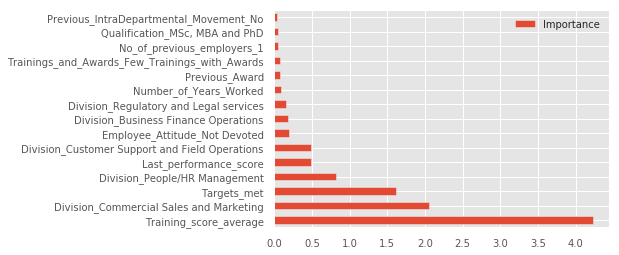

In [111]:
feat_importance = pd.DataFrame(lr.coef_[0], index = Feature_names, 
                               columns=['Importance'])
feat_importance.nlargest(15, columns=['Importance']).plot(kind='barh')

### Parameter and Hyperparameter tunning for Support Vector Classifier Model

In [112]:
 # Using Support Vector Machine

pipeline_svm = Pipeline([('Scaling', StandardScaler()), 
                        ('svc', SVC(cache_size=7000, probability=True))])

param_grid_svm = {
    'svc__random_state':[0, 20, 30, 42],
    'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__gamma':['scale', 'auto'],
    'svc__C':[1e5, 1e3, 1e-1,1e1],
    #'svc__max_iter':[10, 50, 100, 150],
    'svc__tol':[1e-3, 1e5, 1e8, 1e-7, 1e-8, 1e-10],
    'svc__decision_function_shape' : ['ovo', 'ovr'],
}

In [ ]:
Random_svm = RandomizedSearchCV(pipeline_svm, cv=5, param_distributions=param_grid_svm)
Random_svm.fit(X_resampled, Y_resampled)

In [ ]:
means = Random_svm.cv_results_['mean_test_score']
stds = Random_svm.cv_results_['std_test_score']
params = Random_svm.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
print("Best: %f using %s" % (Random_svm.best_score_, Random_svm.best_params_))

### Implementing the Best Results on Support Vector Classifier 

In [ ]:
# Building a basic SVM model using the SVC method
supportvector = SVC(random_state=30, decision_function_shape='ovo', probability=True, 
                    gamma='auto', kernel='linear', tol = 1e-7, C=0.1, max_iter=10)
supportvector.fit(X_resampled, Y_resampled)
s_predict = supportvector.predict(X_test)

# How is our Accuracy Level?
print(np.unique(s_predict))
print("Accuracy: %.2f%%" % accuracy_score(y_test, s_predict))
print(classification_report(y_test , s_predict))

# Confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=s_predict)
print('Confusion matrix:\n', conf_mat)

# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(supportvector,X_resampled,Y_resampled, cv=5))

### Assigning the Classification Report and Accuracy Score

In [ ]:
svc_accuracy = accuracy_score(y_test, s_predict)
svc_precision = precision_score(y_test, s_predict, average='macro')
svc_f1_score = f1_score(y_test, s_predict, average='macro')
svc_recall = recall_score(y_test, s_predict, average='macro')

### Plotting Feature Importance

In [ ]:
feat_importance = pd.Series(abs(supportvector.coef_[0]), index = Feature_names)
feat_importance.nlargest().plot(kind='barh')

### Parameter and Hyperparameter tunning for Random Forest Classifier Model

In [ ]:
 # Using Random Forest Classifier

pipeline_rfc = Pipeline([('Scaling', StandardScaler()), 
                        ('randomforest', RandomForestClassifier())])

param_grid_rfc = {
    'randomforest__random_state':[0, 20, 30, 42],
    'randomforest__criterion':['gini', 'entropy'],
    'randomforest__oob_score':['False', 'True'],
    'randomforest__n_estimators':[100, 150, 200, 250],
    'randomforest__max_depth':[5, 10, 2, 20],
    'randomforest__max_features' : ['auto', 'sqrt', 'log2'],
}

In [ ]:
Random_rfc = RandomizedSearchCV(pipeline_rfc, cv=5, param_distributions=param_grid_rfc)
Random_rfc.fit(X_resampled, Y_resampled)

In [ ]:
means = Random_rfc.cv_results_['mean_test_score']
stds = Random_rfc.cv_results_['std_test_score']
params = Random_rfc.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
print("Best: %f using %s" % (Random_rfc.best_score_, Random_rfc.best_params_))

### Implementing the Best Results on Random Forest Classifier

In [ ]:
# Building a basic random forest using the RandomForestClassifier method
randomforest = RandomForestClassifier(random_state=42, n_estimators=100, max_features='sqrt',
                                      criterion= 'gini', oob_score=False, max_depth=20)
randomforest.fit(X_resampled, Y_resampled)
rfc_predict = randomforest.predict(X_test)

# What is our Accuracy Level?
# Is our model still predicting only one class?
print('The model is predicting both classes :', np.unique(rfc_predict))  
print("Accuracy: %.2f%%" % accuracy_score(y_test, rfc_predict))
print(classification_report(y_test, rfc_predict))

# Confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=rfc_predict)
print('Confusion matrix:\n', conf_mat)

# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(randomforest,X_resampled,Y_resampled, cv=5))

### Assigning the Accuracy Score and Classification Report of Random Forest

In [ ]:
rfc_accuracy = accuracy_score(y_test, rfc_predict)
rfc_precision = precision_score(y_test, rfc_predict, average='macro')
rfc_f1_score = f1_score(y_test, rfc_predict, average='macro')
rfc_recall = recall_score(y_test, rfc_predict, average='macro')

In [ ]:
(by='importance', ascending=False,)

### Plotting Feature Importance

In [ ]:
Features = Feature_names

Feature_importance = randomforest.feature_importances_
checking_indices = np.argsort(Feature_importance)

# Plotting
plt.figure(figsize=(10,8))
plt.barh(range(len(checking_indices)), Feature_importance[checking_indices],
        color = 'navy', align = 'center')
#plt.yticks(range(len(checking_indices)), [Features[i] for i in checking_indices])
plt.xlabel('F-Score')
plt.ylabel('Features')

plt.show()

In [ ]:
feat_importance = pd.Series(randomforest.feature_importances_, index = Feature_names)
feat_importance.nlargest(20).plot(kind='barh')

### Parameter and Hyperparameter tunning for Decision Tree Classifier Model

In [ ]:
 # Using Decision Tree Classifier

pipeline_dtc = Pipeline([('Scaling', StandardScaler()), 
                        ('decisionTree', DecisionTreeClassifier(presort=True))])

param_grid_dtc = {
    'decisionTree__random_state':[0, 20, 30, 42],
    'decisionTree__criterion':['gini', 'entropy'],
    'decisionTree__splitter':['best', 'random'],
    'decisionTree__max_depth':[5, 10, 2, 20],
    'decisionTree__max_features' : ['auto', 'sqrt', 'log2'],
}

In [ ]:
Random_dtc = RandomizedSearchCV(pipeline_dtc, cv=5, param_distributions=param_grid_dtc)
Random_dtc.fit(X_resampled, Y_resampled)

In [ ]:
means = Random_dtc.cv_results_['mean_test_score']
stds = Random_dtc.cv_results_['std_test_score']
params = Random_dtc.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
print("Best: %f using %s" % (Random_dtc.best_score_, Random_dtc.best_params_))

### Implementing the Best Results on Basic Decision Tree Classifier

In [ ]:
# Implementing a basic decision tree using DecisionTreeClassifier method
decisionTree = DecisionTreeClassifier(random_state=42,splitter='random', max_depth=5,
                                      criterion='gini', max_features='log2')
decisionTree = decisionTree.fit(X_resampled, Y_resampled)
dtc_predict = decisionTree.predict(X_test)

# What is our Accuracy Level?
print(np.unique(dtc_predict))
print("Accuracy: %.2f%%" % accuracy_score(y_test, dtc_predict))
print(classification_report(y_test, dtc_predict))

# Confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=dtc_predict)
print('Confusion matrix:\n', conf_mat)

# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(decisionTree,X_resampled,Y_resampled, cv=5))

#### Assigning the Accuracy and Classification Report of Decision Tree

In [ ]:
dtc_accuracy = accuracy_score(y_test, dtc_predict)
dtc_precision = precision_score(y_test, dtc_predict, average='macro')
dtc_f1_score = f1_score(y_test, dtc_predict, average='macro')
dtc_recall = recall_score(y_test, dtc_predict, average='macro')

### Plotting Feature Importance

In [ ]:
feat_importance = pd.DataFrame(decisionTree.feature_importances_, index = Feature_names,
                              columns=['Importance']).sort_values('Importance', ascending=True)
feat_importance.nlargest(15, columns=['Importance']).plot(kind='barh')
plt.ylabel('Features')
plt.xlabel('F-Score')

### Parameter and Hyperparameter tunning for XGBoot Classifier Model

In [ ]:
# using only XGBoosting Classifier without PCA
pipeline_xgb = Pipeline([('Scaling', StandardScaler()), 
                     ('boosting', XGBClassifier())])

# Getting Parameters for the grid

param_grid_xgb = {
    'boosting__learning_rate':[0.0001, 0.001, 0.01, 0.1],
    'boosting__n_estimators':[100, 150, 200, 250],
    'boosting__max_depth':[3, 5, 8, 12], 
    'boosting__objective':['binary:logistic'], 
    'boosting__reg_alpha':[0.001, 0.01, 0.1], 
    'boosting__random_state':[0, 20, 30, 42], 
    'boosting__eval_metric':['auc', 'error','logloss','error@0.6'],
    'boosting__booster':['gbtree', 'gblinear', 'dart'],
    'boosting__base_score':[0.1, 0.5, 0.8, 0.9],
    'boosting__gamma':[0.0, 0.3, 0.5, 1.0, 2.0, 5.0 ],
    'boosting__max_features':['auto', 'sqrt', 'log2']
}

In [ ]:
Random_xgb = RandomizedSearchCV(pipeline_xgb, cv=5, param_distributions=param_grid_xgb)
Random_xgb.fit(X_resampled, Y_resampled)

In [ ]:
means = Random_dtc.cv_results_['mean_test_score']
stds = Random_dtc.cv_results_['std_test_score']
params = Random_dtc.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
print("Best: %f using %s" % (Random_xgb.best_score_, Random_xgb.best_params_))

### Implementing the Best Results on Xgboost Classifier Model

In [ ]:
# fit XgBoost model on training data
xgb_model =XGBClassifier(objective="binary:logistic",reg_alpha=0.001,max_depth=12,base_score=0.1,
                          random_state=30, learning_rate=0.1, n_estimators=250, gamma=0.3,
                          max_features='sqrt', eval_metric=["auc", 'logloss', 'error'], 
                         booster='gbtree')
                          

xgb_model.fit(X_resampled, Y_resampled, eval_set=[(X_resampled, Y_resampled),
                                                  (X_test, y_test.values)], verbose=False)

# make predictions for test data
xgb_predict = xgb_model.predict(X_test)

In [ ]:
# evaluate predictions and Printing the Accuracy Level
print(np.unique(xgb_predict))
accuracy = accuracy_score(y_test, xgb_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
classification = classification_report(y_test, xgb_predict)
print(classification)

# Confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=xgb_predict)
print('Confusion matrix:\n', conf_mat)

In [ ]:
# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(xgb_model, X_resampled,Y_resampled, cv=5))

In [ ]:
print("best score: {0},\n best iteration: {1},\n best ntree limit {2}".format(xgb_model.best_score, 
      xgb_model.best_iteration, xgb_model.best_ntree_limit))

In [ ]:
xgb_accuracy = accuracy_score(y_test, xgb_predict)
xgb_precision = precision_score(y_test, xgb_predict, average='macro')
xgb_f1_score = f1_score(y_test, xgb_predict, average='macro')
xgb_recall = recall_score(y_test, xgb_predict, average='macro')

### Fit the model using Importance as the Threshold

In [ ]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

In [ ]:
xgb_model.get_booster().feature_names = Feature_names
thresholds = sort(xgb_model.feature_importances_)
for thresh in thresholds:
    # Select features using threshold
    Selection = SelectFromModel(xgb_model, threshold = thresh, prefit=True)
    select_X_resampled = Selection.transform(X_resampled)
    
    # train model
    model_selection = XGBClassifier(objective="binary:logistic",reg_alpha=0.1,max_depth=12,
                                    base_score=0.9,random_state=42,learning_rate=0.1,gamma=0.05,
                                    n_estimators=1000,max_features='auto', 
                                    eval_metric=["auc", 'logloss', 'error'], booster='gbtree')
    model_selection.fit(select_X_resampled, Y_resampled)
    
    # model Evaluation
    select_X_test = Selection.transform(X_test)
    xgb_predict = model_selection.predict(select_X_test)
    predictions = [round(value) for value in xgb_predict]
    F1_Score = f1_score(y_test, predictions, average = 'macro')
    Accuracy_Score = accuracy_score(y_test, predictions)
    print('Thresh=%.3f, n=%d, F1-Score: %.3f%%, Accuracy: %.3f%%'%(thresh,
                                                                   select_X_resampled.shape[1], 
                                                                   F1_Score*100.0,
                                                                   Accuracy_Score*100.0))

### Important Features

In [ ]:
xgb_model.get_booster().feature_names = Feature_names

Import_Features = pd.DataFrame(xgb_model.feature_importances_,columns = ['importance'])
Import_Features.sort_values(by='importance', ascending=True)

### Plotting of the Important Features

In [ ]:
# Reassigning the feature names to the array 
xgb_model.get_booster().feature_names = Feature_names

# Plotting the important features
xgb.plot_importance(xgb_model,max_num_features= 15, height=0.3).set_yticklabels(Feature_names)

# plot the output tree via matplotlib, specifying the ordinal number of the target tree
#xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)

# converts the target tree to a graphviz instance
#xgb.to_graphviz(xgb_model, num_trees= xgb_model.best_iteration)

## Summary of Model Reports

In [ ]:
Summary=[['Binary Logistic Regression',lr_accuracy,lr_precision,lr_recall,lr_f1_score],
      ['Decision Tree Classifier',dtc_accuracy,dtc_precision,dtc_recall,dtc_f1_score],
      ['Random Forest Classifier',rfc_accuracy,rfc_precision,rfc_recall,rfc_f1_score],
      ['Support Vector Machine Classifier',svc_accuracy,svc_precision,svc_recall,svc_f1_score],
      ['xgBoost Classifier',xgb_accuracy,xgb_precision,xgb_recall,xgb_f1_score] 
]

Performance_Summary=pd.DataFrame(Summary)

Performance_Summary.columns=['Classifier','Accuracy','Precision','Recall','F1-Score']

In [ ]:
Performance_Summary.sort_values(by='F1-Score', ascending=False)

## ROC Curve for the Considered Models

In [ ]:
# Computing ROC curve and ROC area for all Models
# For Logistic Regression
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, pred_y)
lr_roc_auc = auc(lr_fpr, lr_tpr)

# For Support Vector Machine
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, s_predict)
svm_roc_auc = auc(svm_fpr, svm_tpr)

# For Random Forest Classifier
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_predict)
rfc_roc_auc = auc(rfc_fpr, rfc_tpr)

# For Decision Tree Classifier
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test, dtc_predict)
dtc_roc_auc = auc(dtc_fpr, dtc_tpr)

# For XGBoost Classifier
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_predict)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

In [ ]:
# The ROC_auc Score
ROC_Score = roc_auc_score(y_test, rfc_predict)
ROC_Score

In [ ]:
#from itertools import cycle

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(lr_fpr, lr_tpr, color = 'black',
         label='Logistic Regression ROC (area = %0.2f)'%lr_roc_auc, linewidth=2,linestyle='dashed')
sns.lineplot(svm_fpr,svm_tpr, color = 'navy', 
         label='Support Vector Machine (area = %0.2f)'%svm_roc_auc, linewidth=2,linestyle=':')
plt.plot(rfc_fpr,rfc_tpr, color = 'blue', 
         label='Random Forest Classifier (area = %0.2f)'%rfc_roc_auc, linewidth=4,linestyle='--')
plt.plot(dtc_fpr,dtc_tpr, color = 'cyan', 
         label='Decision Tree Classifier (area = %0.2f)'%dtc_roc_auc, linewidth=4,linestyle='-.')
sns.lineplot(xgb_fpr,xgb_tpr, color = 'magenta', 
         label='XGBoost Classifier (area = %0.2f)'%xgb_roc_auc, linewidth=2, linestyle='dotted')
plt.legend(prop = {'size':13},loc='best')
plt.title('Receiver Operating Characteristic (ROC Curve) for all models with ROC_Score = %0.2f'% ROC_Score)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.show()

## VOTING ENSEMBLE FOR THE FIVE CLASSIFICATION

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
## Now we create sub models
estimators = []

model_1 = lr
estimators.append(('log_reg', model_1))

model_2 = decisionTree
estimators.append(('decision_Tree', model_2))

model_3 = randomforest
estimators.append(('random_forest', model_3))

model_4 = supportvector
estimators.append(('support_vector', model_4))

model_5 = xgb_model
estimators.append(('xgb_model', model_5))

In [ ]:
# Creating the ensemble model with the parameters, "Hard, Soft, and Weighted"

Ensemble_Hard = VotingClassifier(estimators, voting='hard').fit(X_resampled,Y_resampled)
Ensemble_Soft = VotingClassifier(estimators, voting= 'soft').fit(X_resampled,Y_resampled)
Ensemble_Weighted = VotingClassifier(estimators, voting='hard', 
                                     weights=[2,1,2,2,3]).fit(X_resampled,Y_resampled)

In [ ]:
# Printing the Results

Results_Hard = cross_val_score(Ensemble_Hard, X_resampled,Y_resampled, cv=5)
print('Mean of Ensemble_Hard :', Results_Hard.mean())
print('Cross Validation Score_Hard : ', Results_Hard)

Results_Soft = cross_val_score(Ensemble_Soft, X_resampled,Y_resampled, cv=5)
print('Mean of Ensemble_Soft :', Results_Soft.mean())
print('Cross Validation Score_Soft: ', Results_Soft)

Results_Weighted = cross_val_score(Ensemble_Weighted, X_resampled,Y_resampled, cv=5)
print('Mean of Ensemble_Weighted :', Results_Weighted.mean())
print('Cross Validation Score_Weighted: ', Results_Weighted)

### Comparing the SIX Models Using their F1_Score

In [ ]:
Indicies = ['Logistic Regression', 'Support Vector', 'Decision Tree', 'Random Forest',
            'XGBoost','Hard Voting Ensemble','Soft Voting Ensemble','Weighted Voting Ensemble']
for (classifier, index) in zip([lr, supportvector, decisionTree, randomforest, xgb_model,
                                Ensemble_Hard, Ensemble_Soft, Ensemble_Weighted], Indicies):

    scores = cross_val_score(classifier, X_resampled, Y_resampled, cv=5, 
                             scoring=metrics.make_scorer(metrics.scorer.f1_score, 
                                                         average="macro"))
    print("F1_Score: %0.2f  [%s]" 
          % (scores.mean(),  index))

In [ ]:
print(estimators)